In [ ]:
#uji hipotesis di statistika masuk EDA
#setting faktor-> untuk machine learning dan untuk data yang bentuknya kuisioner untuk analisis faktor
#analisis faktor menentukan faktor yang optimal baik faktor baru maupun faktor yang sudah ada. terdapat banyak teknik analisis faktor

In [ ]:
#seleksi bisa analisis faktor, bisa PCA
#bins -> pembagian bar chart kalau 10 ya dibagi 10
#x -> lebar petal, y-> panjang, z = tinggi petal (linear atau berbanding lurus, kalau panjang 1 ya lebar 1)
#panjang sepan = sekitar 5-7 cm kalau petal panjangnya tersebar merata sekitar 1-5 cm, jadi plotting/distribusinya dalam bentuk boxplot
#cara baca boxplot tersebar dari garis - atas dan bawah, tapi domina di kotak. di atas dan di bawah - ada tapi lebih sedikit


In [ ]:
#mean plot-> hanaya untuk rata-rata
#kalau ada garis di tengah dia rata-rata keseluruhan

In [ ]:
#EDA menggunakan python
#data quality check menggunakan impor pandas, cleaning, menemukan bbrp feature, dll
#mean median modus di data  quality check atau quantitative test
#statisical mengecek korelasi
#quantitative test mengecek sebaran percentile, dll
#visualization yang tepat tergantung data dan atribut yang kita punya

In [ ]:
#multivariate analysis -> mengecek korelasi, outputnya matrix

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read Dataset and Load Data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/backup/kuliah/sem 3/IFSD/code/Virtual_Reality_in_Education_Impact.csv')
data

,Student_ID,Age,Gender,Grade_Level,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Subject,Instructor_VR_Proficiency,Perceived_Effectiveness_of_VR,Access_to_VR_Equipment,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Feedback_from_Educators_on_VR,Interest_in_Continuing_VR_Based_Learning,Region,School_Support_for_VR_in_Curriculum
0,STUD0001,13,Non-binary,Postgraduate,Science,No,6,1,Yes,Computer Science,Intermediate,3,Yes,5,High,No,Neutral,No,South America,No
1,STUD0002,16,Non-binary,Undergraduate,Medicine,No,6,1,Yes,Math,Beginner,2,Yes,3,Low,Yes,Positive,No,Oceania,No
2,STUD0003,15,Prefer not to say,High School,Science,No,4,5,Yes,Art,Advanced,5,Yes,2,Low,Yes,Neutral,Yes,Oceania,No
3,STUD0004,24,Female,Postgraduate,Engineering,Yes,2,4,No,Economics,Beginner,5,No,3,High,No,Neutral,No,Europe,Yes
4,STUD0005,22,Non-binary,Undergraduate,Arts,Yes,10,3,No,Art,Beginner,4,Yes,1,Medium,No,Negative,Yes,North America,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,STUD4996,18,Male,Undergraduate,Engineering,No,10,4,No,Biology,Advanced,1,Yes,1,High,Yes,Neutral,Yes,Asia,No
4996,STUD4997,25,Male,High School,Medicine,No,5,1,Yes,Art,Advanced,4,Yes,5,Medium,No,Negative,Yes,South America,No
4997,STUD4998,25,Female,High School,Engineering,No,1,4,No,Computer Science,Beginner,2,No,3,Low,Yes,Negative,Yes,North America,No
4998,STUD4999,22,Female,Undergraduate,Science,No,4,3,Yes,Math,Beginner,3,Yes,3,Low,No,Negative,Yes,Africa,No


**Data Overview**

**Data Understanding**
1.   Student_ID -> kode unik (str)

2.   Age -> Umur(int)
3. Gender -> Jenis Kelamin(kategorikal)
4. Grade_Level -> Tingkat Pendidikan(kategorikal)
5. Field_of_Study -> Jurusan(kategorikal)
6. Usage_of_VR_in_Education -> Survei penggunaan VR(Kategorikal yes/no)
7. Hours_of_VR_Usage_Per_Week -> Jumlah jam penggunaan VR per minggu oleh siswa(int)
8. Engagement_Level -> Tingkat keterlibatan siswa menggunaka VR(1 rendah, 5 tinggi)
9. Improvement_in_Learning_Outcomes -> pengaruh dalam hasil belajar(kategorikal yes/no)
10. Subject -> mata pelajaran yang diambil dan menggunakan VR (kategorikal)
11. Instructor_VR_Proficiency -> Tingkat kemahiran instruktur dalam menggunakan VR(kategorikal)
12. Perceived_Effectiveness_of_VR -> Persepsi siswa tentang seberapa efektif VR dalam pendidikan, dinilai pada skala 1-5(int)
13. Access_to_VR_Equipment -> apakah siswa memiliki akses ke perangkat VR (Kategorikal (Yes/No))
14. Impact_on_Creativity -> apakah penggunaan VR meningkatkan kreativitas siswa(Kategorikal (Yes/No))
15. Stress_Level_with_VR_Usage -> Tingkat stres yang dirasakan siswa saat menggunakan VR, biasanya dinilai pada skala dari 1 hingga 5 (1: rendah, 5: tinggi)(int)
16. Collaboration_with_Peers_via_VR -> Apakah siswa dapat berkolaborasi dengan teman sebaya melalui penggunaan VR (Kategorikal (Yes/No))
17. Feedback_from_Educators_on_VR -> Umpan balik yang diberikan oleh pendidik mengenai penggunaan VR (kategorikal)
18.Interest_in_Continuing_VR_Based_Learning -> Minat siswa untuk terus menggunakan VR dalam pembelajaran di masa depan(kategorikal yes/no)
19. Region -> wilayah tempat siswa (kategorikal)
20.School_Support_for_VR_in_Curriculum -> Apakah sekolah mendukung penggunaan VR dalam kurikulum (Kategorikal (Yes/No))

Link gdocs https://docs.google.com/document/d/1mZkugEE4Qu5vlWmXXQoHXyAfvZNT2r0E8iBQXolwXgo/edit?usp=sharing
materi, faktor, dll

In [ ]:
data.head()

,Student_ID,Age,Gender,Grade_Level,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Subject,Instructor_VR_Proficiency,Perceived_Effectiveness_of_VR,Access_to_VR_Equipment,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Feedback_from_Educators_on_VR,Interest_in_Continuing_VR_Based_Learning,Region,School_Support_for_VR_in_Curriculum
0,STUD0001,13,Non-binary,Postgraduate,Science,No,6,1,Yes,Computer Science,Intermediate,3,Yes,5,High,No,Neutral,No,South America,No
1,STUD0002,16,Non-binary,Undergraduate,Medicine,No,6,1,Yes,Math,Beginner,2,Yes,3,Low,Yes,Positive,No,Oceania,No
2,STUD0003,15,Prefer not to say,High School,Science,No,4,5,Yes,Art,Advanced,5,Yes,2,Low,Yes,Neutral,Yes,Oceania,No
3,STUD0004,24,Female,Postgraduate,Engineering,Yes,2,4,No,Economics,Beginner,5,No,3,High,No,Neutral,No,Europe,Yes
4,STUD0005,22,Non-binary,Undergraduate,Arts,Yes,10,3,No,Art,Beginner,4,Yes,1,Medium,No,Negative,Yes,North America,Yes


In [ ]:
data.describe()

,Age,Hours_of_VR_Usage_Per_Week,Engagement_Level,Perceived_Effectiveness_of_VR,Impact_on_Creativity
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.182200,5.025400,3.021400,2.951600,3.019600
std,5.461957,3.140816,1.427358,1.417625,1.437508
min,12.000000,0.000000,1.000000,1.000000,1.000000
25%,16.000000,2.000000,2.000000,2.000000,2.000000
50%,21.000000,5.000000,3.000000,3.000000,3.000000
75%,26.000000,8.000000,4.000000,4.000000,4.000000
max,30.000000,10.000000,5.000000,5.000000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Student_ID                                5000 non-null   object
 1   Age                                       5000 non-null   int64 
 2   Gender                                    5000 non-null   object
 3   Grade_Level                               5000 non-null   object
 4   Field_of_Study                            5000 non-null   object
 5   Usage_of_VR_in_Education                  5000 non-null   object
 6   Hours_of_VR_Usage_Per_Week                5000 non-null   int64 
 7   Engagement_Level                          5000 non-null   int64 
 8   Improvement_in_Learning_Outcomes          5000 non-null   object
 9   Subject                                   5000 non-null   object
 10  Instructor_VR_Proficiency                 5000 n

**Data Cleaning**

In [ ]:
data.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Grade_Level,0
Field_of_Study,0
Usage_of_VR_in_Education,0
Hours_of_VR_Usage_Per_Week,0
Engagement_Level,0
Improvement_in_Learning_Outcomes,0
Subject,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data

,Student_ID,Age,Gender,Grade_Level,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Subject,Instructor_VR_Proficiency,Perceived_Effectiveness_of_VR,Access_to_VR_Equipment,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Feedback_from_Educators_on_VR,Interest_in_Continuing_VR_Based_Learning,Region,School_Support_for_VR_in_Curriculum
0,STUD0001,13,Non-binary,Postgraduate,Science,No,6,1,Yes,Computer Science,Intermediate,3,Yes,5,High,No,Neutral,No,South America,No
1,STUD0002,16,Non-binary,Undergraduate,Medicine,No,6,1,Yes,Math,Beginner,2,Yes,3,Low,Yes,Positive,No,Oceania,No
2,STUD0003,15,Prefer not to say,High School,Science,No,4,5,Yes,Art,Advanced,5,Yes,2,Low,Yes,Neutral,Yes,Oceania,No
3,STUD0004,24,Female,Postgraduate,Engineering,Yes,2,4,No,Economics,Beginner,5,No,3,High,No,Neutral,No,Europe,Yes
4,STUD0005,22,Non-binary,Undergraduate,Arts,Yes,10,3,No,Art,Beginner,4,Yes,1,Medium,No,Negative,Yes,North America,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,STUD4996,18,Male,Undergraduate,Engineering,No,10,4,No,Biology,Advanced,1,Yes,1,High,Yes,Neutral,Yes,Asia,No
4996,STUD4997,25,Male,High School,Medicine,No,5,1,Yes,Art,Advanced,4,Yes,5,Medium,No,Negative,Yes,South America,No
4997,STUD4998,25,Female,High School,Engineering,No,1,4,No,Computer Science,Beginner,2,No,3,Low,Yes,Negative,Yes,North America,No
4998,STUD4999,22,Female,Undergraduate,Science,No,4,3,Yes,Math,Beginner,3,Yes,3,Low,No,Negative,Yes,Africa,No


**Univariate Analysis**

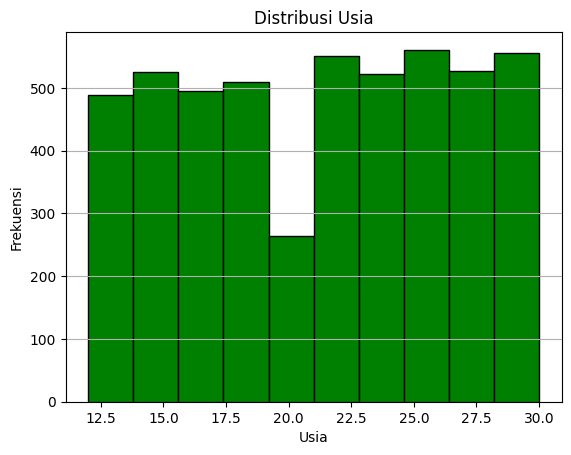

In [ ]:
#melihat distribusi usia dengan histogram
plt.hist(data['Age'], bins=10, color='green', edgecolor='black')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.title('Distribusi Usia')
plt.show()

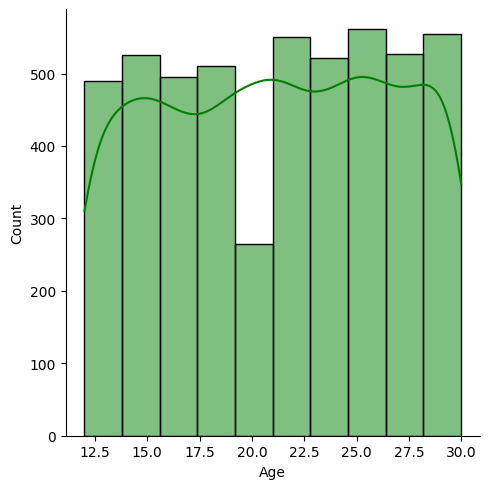

In [ ]:
sns.displot(data['Age'], bins=10, kde=True, color='green')
plt.show()

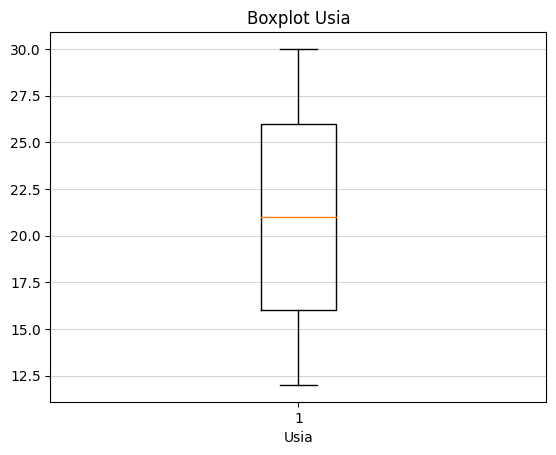

In [ ]:
#membuat boxplot usia
plt.boxplot(data['Age'])
plt.grid(axis='y', linestyle='-', alpha=0.5) #alpha opacity garis
plt.xlabel('Usia')
plt.title('Boxplot Usia')
plt.show()

<ipython-input-57-d165da2141ba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=major, x='Grade_Level', y='Count', palette='rocket')


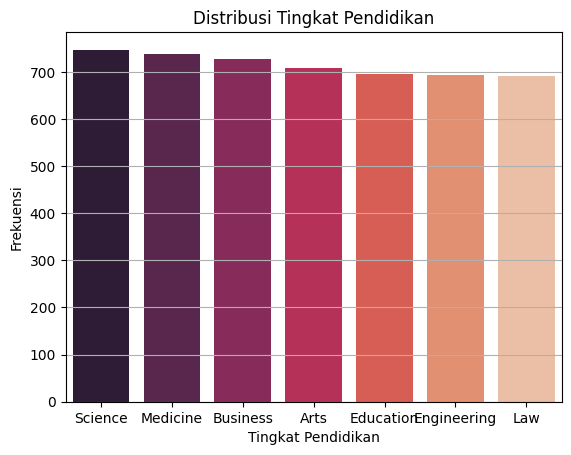

In [ ]:
#melihat distribusi tingkat pendidikan
tingkat_pendidikan = data['Grade_Level'].value_counts().reset_index()
major.columns = ['Grade_Level', 'Count']
sns.barplot(data=major, x='Grade_Level', y='Count', palette='rocket')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.title('Distribusi Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Frekuensi')
plt.show()

**Cara Membaca Boxplot**

https://images.app.goo.gl/rekHJNa7k3Z5WH3w6

pada box plot tersebut tidak ditemukan outlier

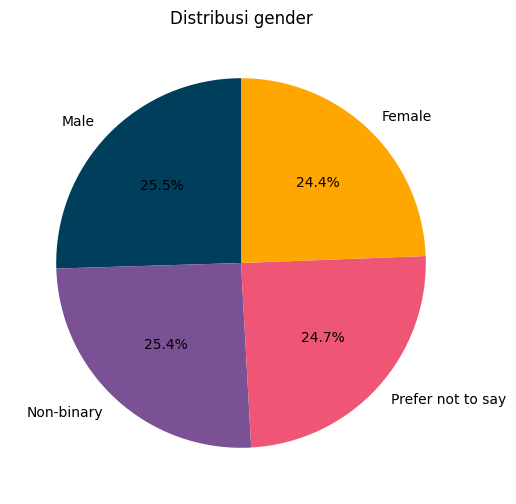

In [ ]:
gender = data['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'count']
colors = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']
fig, ax = plt.subplots(figsize=(6,6)) #ukuran pie chart
ax.pie(gender['count'], labels=gender['Gender'], autopct='%1.1f%%', startangle=90, colors=colors)
#startangle = 90 mengatur rotasi pie chart dari 90 agar bagus
plt.title('Distribusi gender')
plt.show()

**Pie Color and Other Chart**

https://www.patternfly.org/charts/colors-for-charts/

https://www.patternfly.org/charts/colors-for-charts/

https://www.learnui.design/tools/data-color-picker.html#palette

In [ ]:
groupgender = data.groupby('Gender')['Grade_Level']
groupgender.value_counts()

Gender             Grade_Level  
Female             High School      411
                   Postgraduate     408
                   Undergraduate    401
Male               High School      434
                   Undergraduate    422
                   Postgraduate     418
Non-binary         Undergraduate    451
                   Postgraduate     418
                   High School      401
Prefer not to say  High School      420
                   Undergraduate    411
                   Postgraduate     405
Name: count, dtype: int64

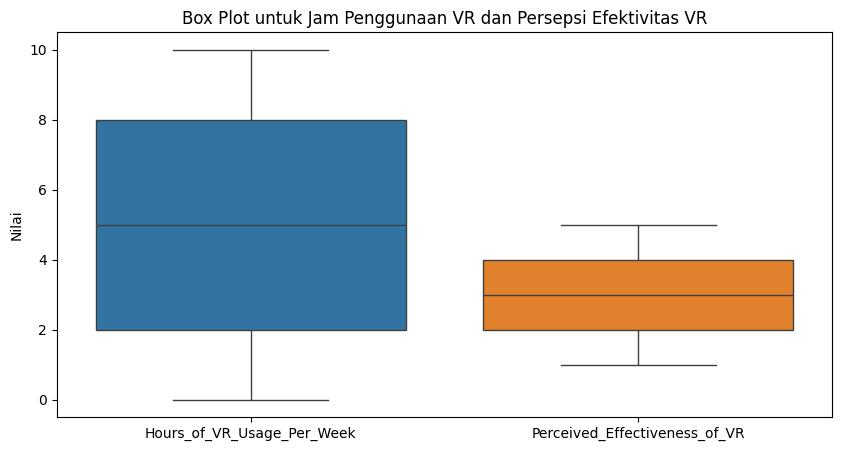

In [ ]:
#box plot penggunaan VR dan Persepsi Efektivitas Vr
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Hours_of_VR_Usage_Per_Week', 'Perceived_Effectiveness_of_VR']])
plt.title('Box Plot untuk Jam Penggunaan VR dan Persepsi Efektivitas VR')
plt.ylabel('Nilai')
plt.show()

<ipython-input-59-38a40b87c47a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=major, x='Field', y='Count', palette='pastel')


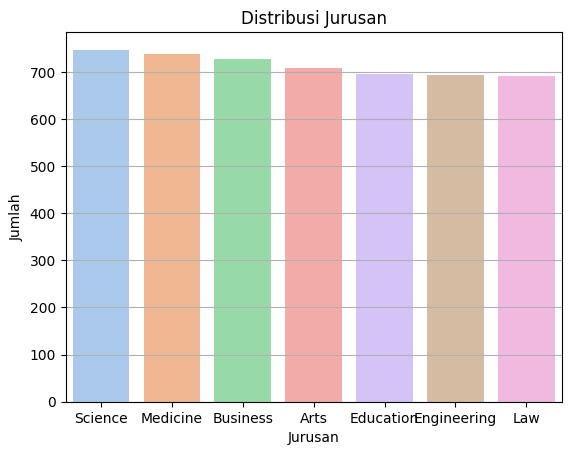

In [ ]:
#Distribusi Jurusan
major = data['Field_of_Study'].value_counts().reset_index()
major.columns = ['Field', 'Count']
sns.barplot(data=major, x='Field', y='Count', palette='pastel')
plt.title('Distribusi Jurusan')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.xlabel('Jurusan')
plt.ylabel('Jumlah')
plt.show()

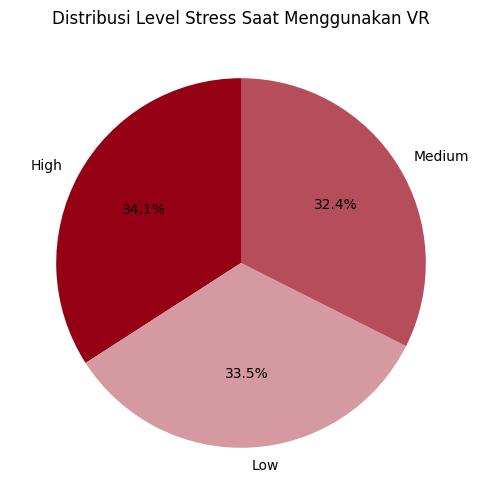

In [ ]:
#Distribusi Level Stress saat menggunakan VR
stresslevel = data['Stress_Level_with_VR_Usage'].value_counts().reset_index()
stresslevel.columns = ['Stress_Level_with_VR_Usage', 'count']
colors = ['#950014', '#d599a1', '#b54d5b']
fig, ax = plt.subplots(figsize=(6,6)) #ukuran pie chart
ax.pie(stresslevel['count'], labels=stresslevel['Stress_Level_with_VR_Usage'], autopct='%1.1f%%', startangle=90, colors=colors)
#startangle = 90 mengatur rotasi pie chart dari 90 agar bagus
plt.title('Distribusi Level Stress Saat Menggunakan VR')
plt.show()

<ipython-input-61-e57a00ce6a1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=negara, x='Region', y='Count', palette='hls')


Text(0.5, 1.0, 'Distribusi Asal Negara')

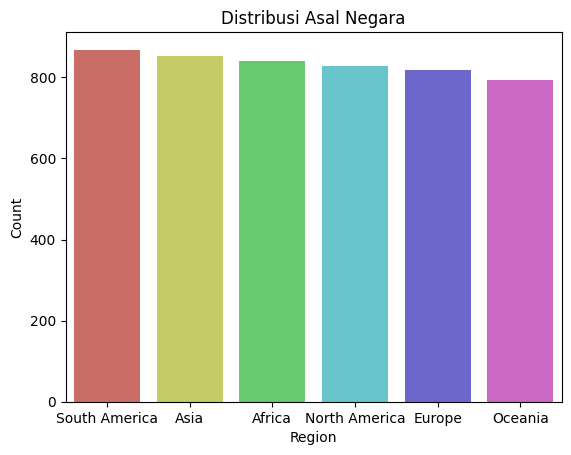

In [ ]:
#Distribusi Asal Negara
negara = data['Region'].value_counts().reset_index()
negara.columns = ['Region', 'Count']
sns.barplot(data=negara, x='Region', y='Count', palette='hls')
plt.title('Distribusi Asal Negara')

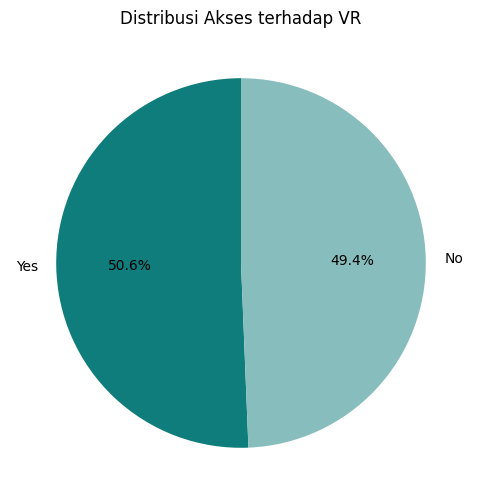

In [ ]:
aksesvr = data['Access_to_VR_Equipment'].value_counts().reset_index()
aksesvr.columns = ['Access_to_VR_Equipment', 'count']
colors = ['#0e7d7b', '#87bebd']
fig, ax = plt.subplots(figsize=(6,6)) #ukuran pie chart
ax.pie(aksesvr['count'], labels=aksesvr['Access_to_VR_Equipment'], autopct='%1.1f%%', startangle=90, colors=colors)
#startangle = 90 mengatur rotasi pie chart dari 90 agar bagus
plt.title('Distribusi Akses terhadap VR')
plt.show()

**Bivariate Analysis**

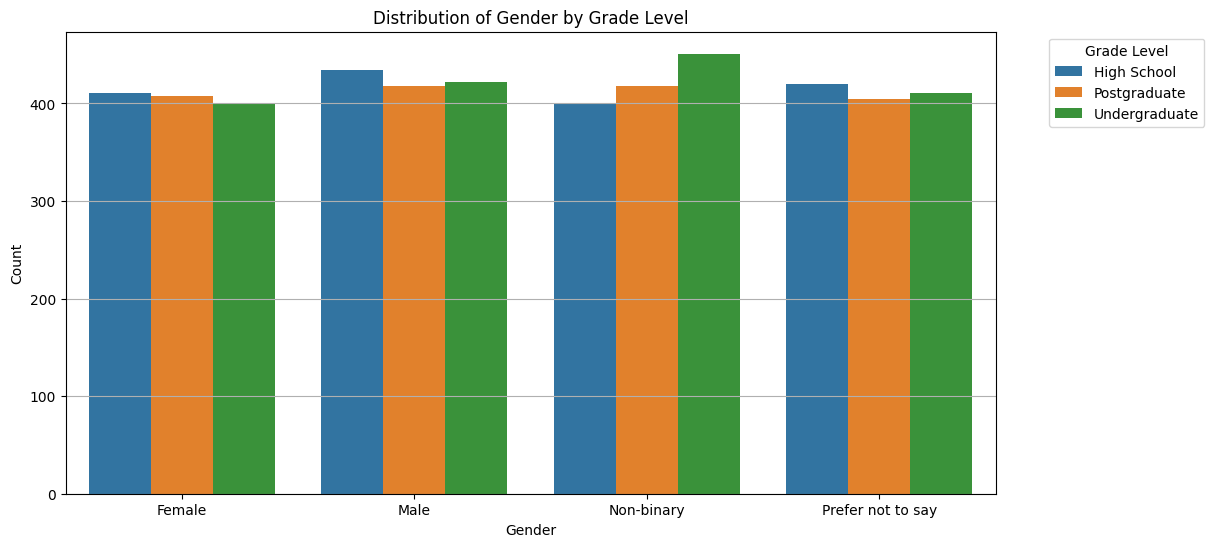

In [ ]:
#Distribution of Gender by Gradee Level (grouped bar chart)
groupgender = data.groupby(['Gender', 'Grade_Level']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(data=groupgender, x='Gender', y='count', hue='Grade_Level')
plt.legend(title='Grade Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender by Grade Level')
plt.show()


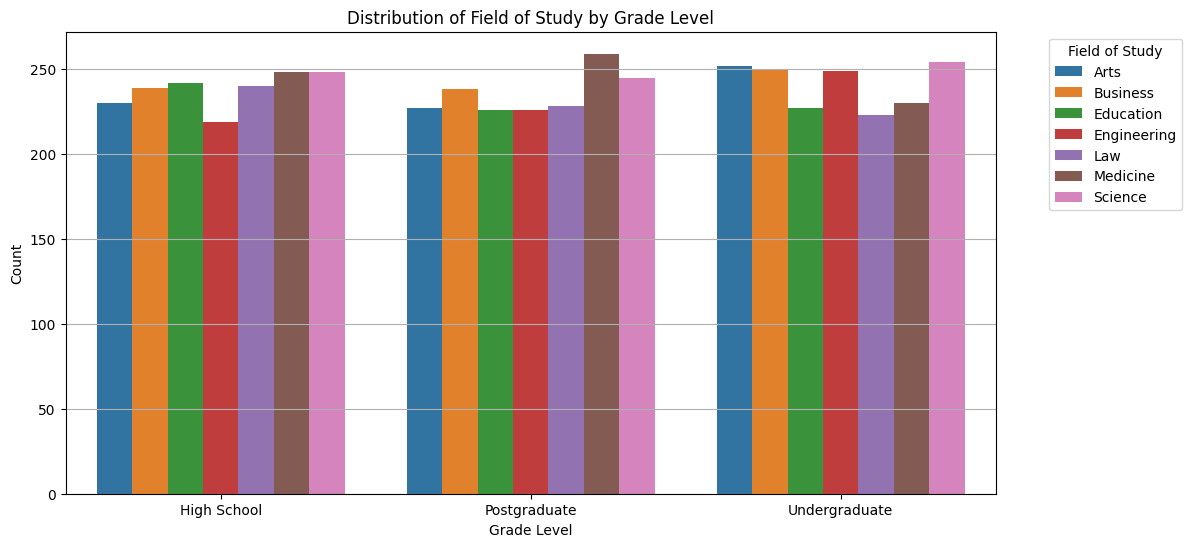

In [ ]:
#Distribution of Field of Study by Garde Level (grouped bar chart)
groupmajor = data.groupby(['Grade_Level', 'Field_of_Study']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(data=groupmajor, x='Grade_Level', y='count', hue='Field_of_Study')
plt.legend(title='Field of Study', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.xlabel('Grade Level')
plt.ylabel('Count')
plt.title('Distribution of Field of Study by Grade Level')
plt.show()


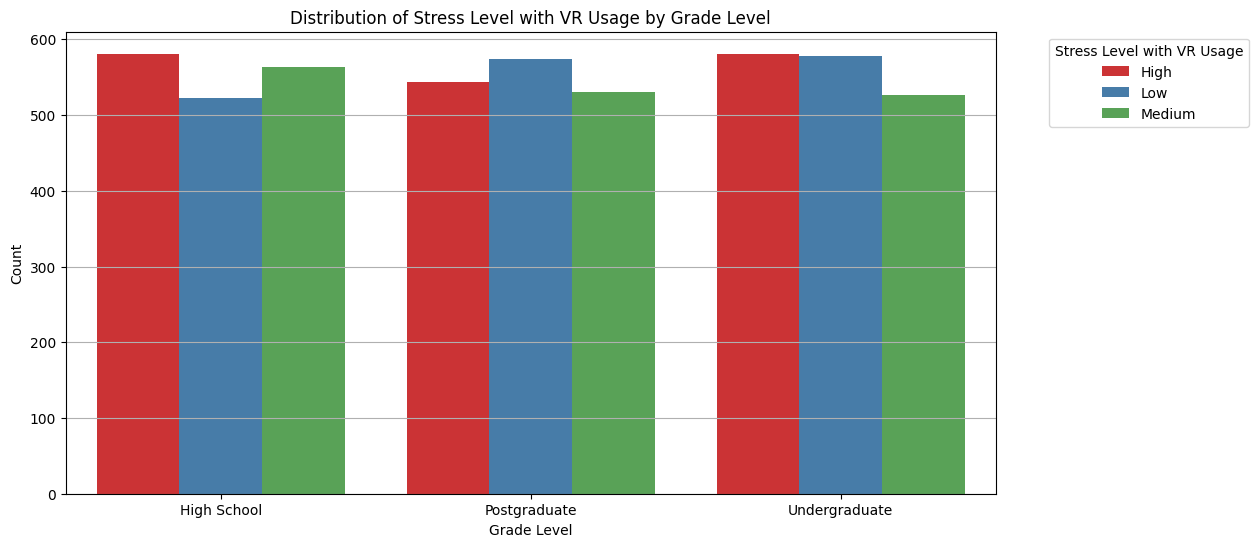

In [ ]:
# Grouping data untuk stres berdasarkan tingkat pendidikan
groupstress = data.groupby(['Grade_Level', 'Stress_Level_with_VR_Usage']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=groupstress, x='Grade_Level', y='count', hue='Stress_Level_with_VR_Usage', palette='Set1')
plt.legend(title='Stress Level with VR Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.xlabel('Grade Level')
plt.ylabel('Count')
plt.title('Distribution of Stress Level with VR Usage by Grade Level')
plt.show()

<ipython-input-33-a48db7bc462e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Field_of_Study', y='Engagement_Level', palette='Set2')


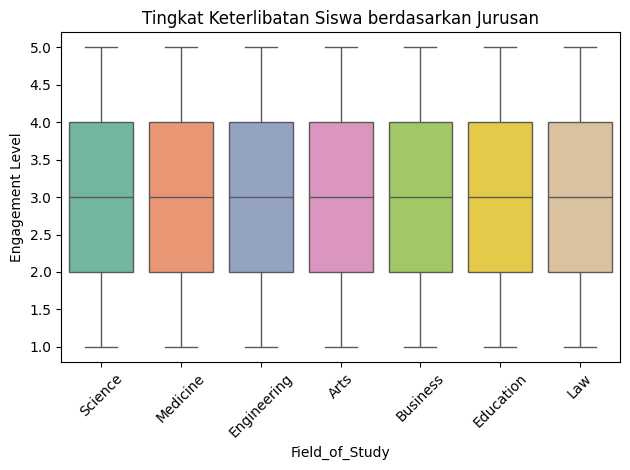

In [ ]:
#membuat boxplot tingkat keterlibatan siswa berdasarkan jurusan
sns.boxplot(data=data, x='Field_of_Study', y='Engagement_Level', palette='Set2')
plt.title('Tingkat Keterlibatan Siswa berdasarkan Jurusan')
plt.ylabel('Engagement Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

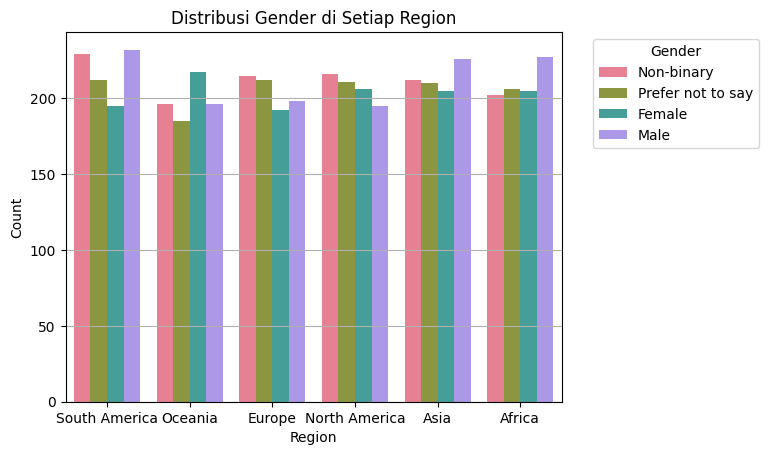

In [ ]:
#membuat countplot distribusi gender di setiap region
sns.countplot(x='Region', hue='Gender', data=data, palette='husl')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.title('Distribusi Gender di Setiap Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

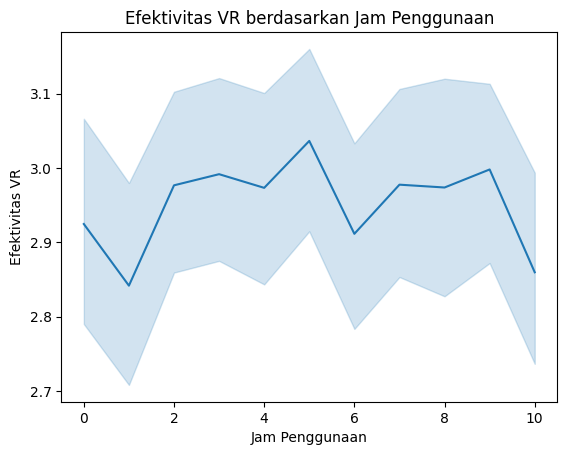

In [ ]:
#lineplot
sns.lineplot(x='Hours_of_VR_Usage_Per_Week', y='Perceived_Effectiveness_of_VR', data=data)
plt.title('Efektivitas VR berdasarkan Jam Penggunaan')
plt.xlabel('Jam Penggunaan')
plt.ylabel('Efektivitas VR')
plt.show()

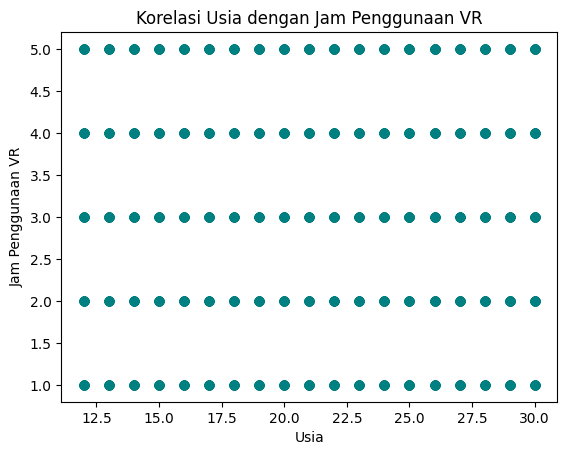

In [ ]:
plt.scatter(data['Age'], data['Engagement_Level'], color='teal')
plt.title('Korelasi Usia dengan Jam Penggunaan VR')
plt.xlabel('Usia')
plt.ylabel('Jam Penggunaan VR')
plt.show()

Text(0.5, 0.98, 'Engagement Level by Age across Regions')

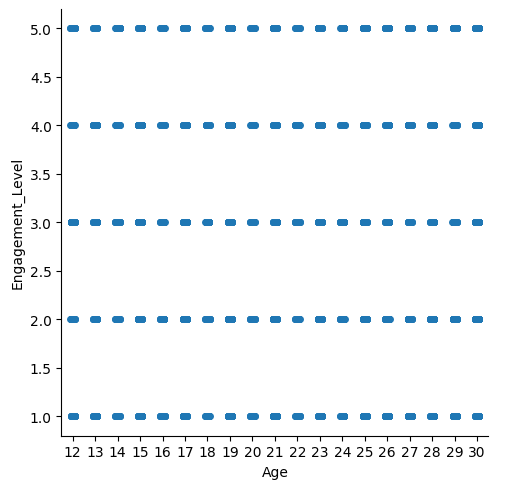

In [ ]:
sns.catplot(data=data, x="Age", y="Engagement_Level")
p.fig.suptitle('Engagement Level by Age across Regions')

In [ ]:
print(data[['Age', 'Engagement_Level']].describe())

               Age  Engagement_Level
count  5000.000000       5000.000000
mean     21.182200          3.021400
std       5.461957          1.427358
min      12.000000          1.000000
25%      16.000000          2.000000
50%      21.000000          3.000000
75%      26.000000          4.000000
max      30.000000          5.000000


Text(0.5, 1.0, 'Matriks Korelasi')

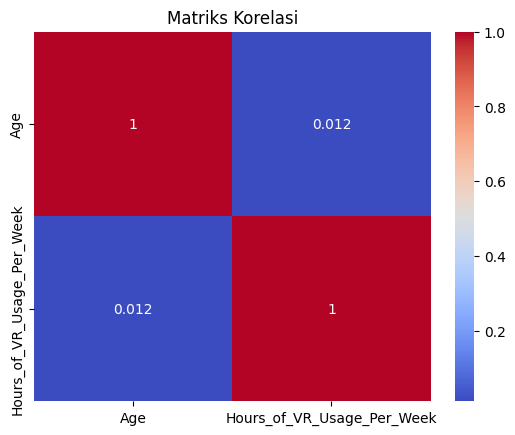

In [ ]:
#correlation matrix
corr = data[['Age', 'Hours_of_VR_Usage_Per_Week']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')

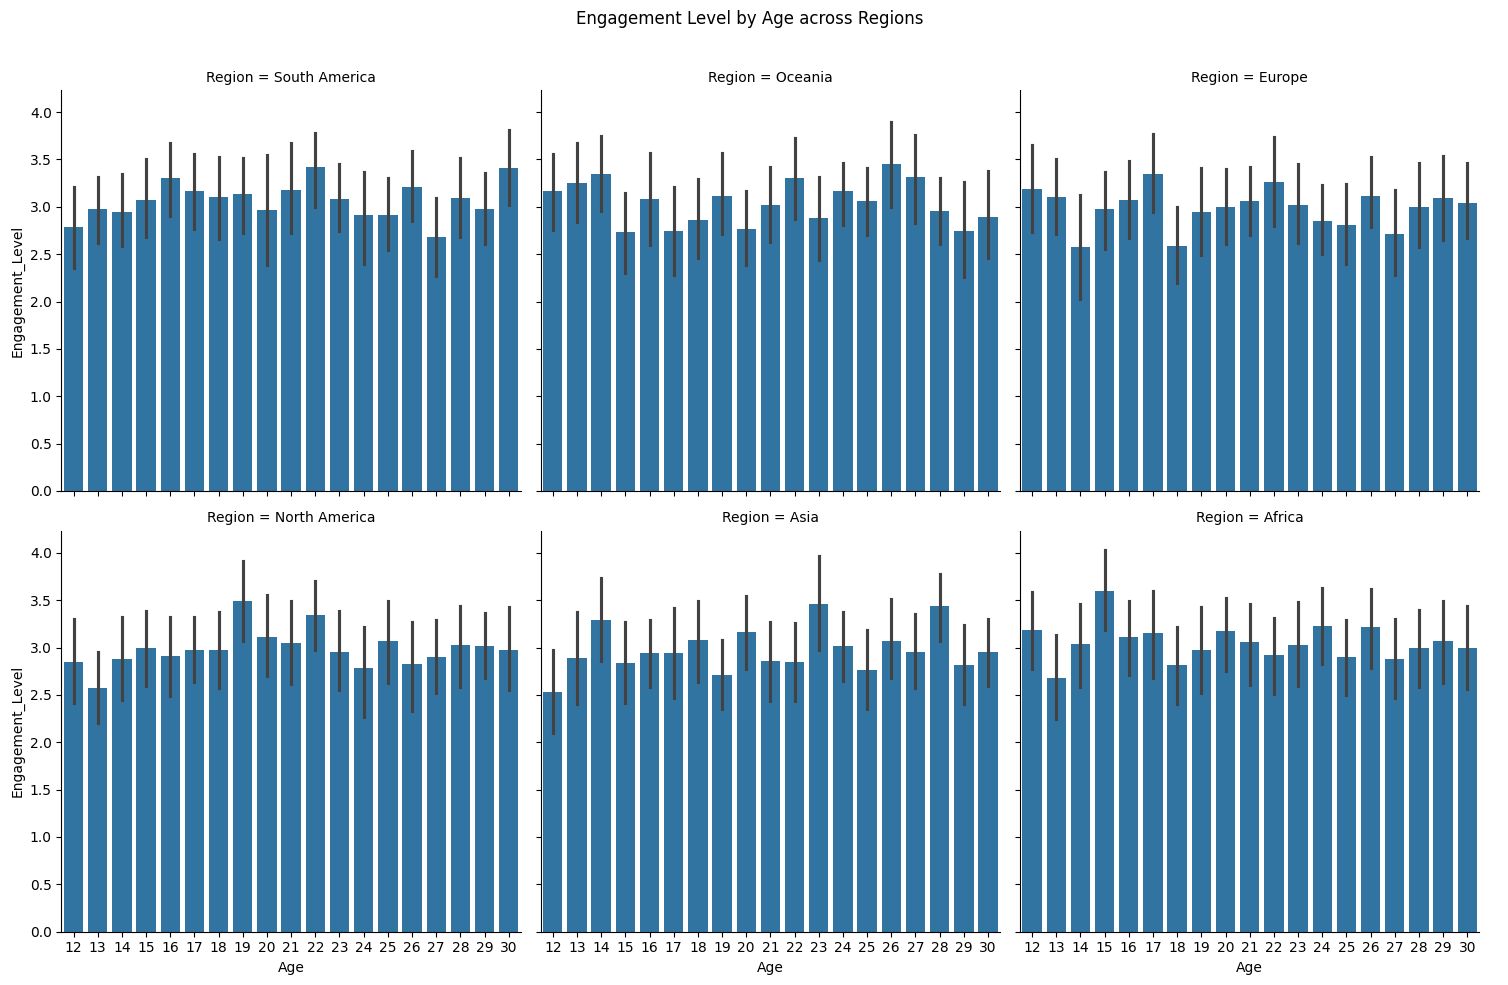

In [ ]:
p = sns.catplot(data=data, x="Age", y="Engagement_Level", col="Region", kind="bar", col_wrap=3)
plt.subplots_adjust(top=0.9)
p.fig.suptitle('Engagement Level by Age across Regions')
plt.show()

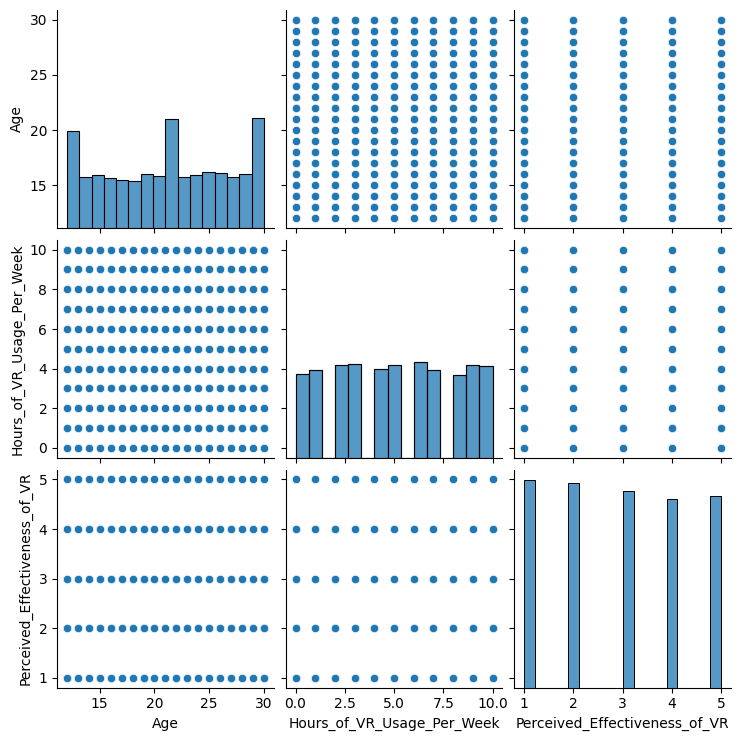

In [ ]:
sns.pairplot(data[['Age', 'Hours_of_VR_Usage_Per_Week', 'Perceived_Effectiveness_of_VR']])

**Multivariate Analysis**

In [ ]:
data
#seberapa kuat penggunaan VR pada usia berapa dan pendidikan/jurusannya apa, apakah setiap jurusan memiliki ketergantungan VR yg berbeda untuk education

,Student_ID,Age,Gender,Grade_Level,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Subject,Instructor_VR_Proficiency,Perceived_Effectiveness_of_VR,Access_to_VR_Equipment,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Feedback_from_Educators_on_VR,Interest_in_Continuing_VR_Based_Learning,Region,School_Support_for_VR_in_Curriculum
0,STUD0001,13,Non-binary,Postgraduate,Science,No,6,1,Yes,Computer Science,Intermediate,3,Yes,5,High,No,Neutral,No,South America,No
1,STUD0002,16,Non-binary,Undergraduate,Medicine,No,6,1,Yes,Math,Beginner,2,Yes,3,Low,Yes,Positive,No,Oceania,No
2,STUD0003,15,Prefer not to say,High School,Science,No,4,5,Yes,Art,Advanced,5,Yes,2,Low,Yes,Neutral,Yes,Oceania,No
3,STUD0004,24,Female,Postgraduate,Engineering,Yes,2,4,No,Economics,Beginner,5,No,3,High,No,Neutral,No,Europe,Yes
4,STUD0005,22,Non-binary,Undergraduate,Arts,Yes,10,3,No,Art,Beginner,4,Yes,1,Medium,No,Negative,Yes,North America,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,STUD4996,18,Male,Undergraduate,Engineering,No,10,4,No,Biology,Advanced,1,Yes,1,High,Yes,Neutral,Yes,Asia,No
4996,STUD4997,25,Male,High School,Medicine,No,5,1,Yes,Art,Advanced,4,Yes,5,Medium,No,Negative,Yes,South America,No
4997,STUD4998,25,Female,High School,Engineering,No,1,4,No,Computer Science,Beginner,2,No,3,Low,Yes,Negative,Yes,North America,No
4998,STUD4999,22,Female,Undergraduate,Science,No,4,3,Yes,Math,Beginner,3,Yes,3,Low,No,Negative,Yes,Africa,No


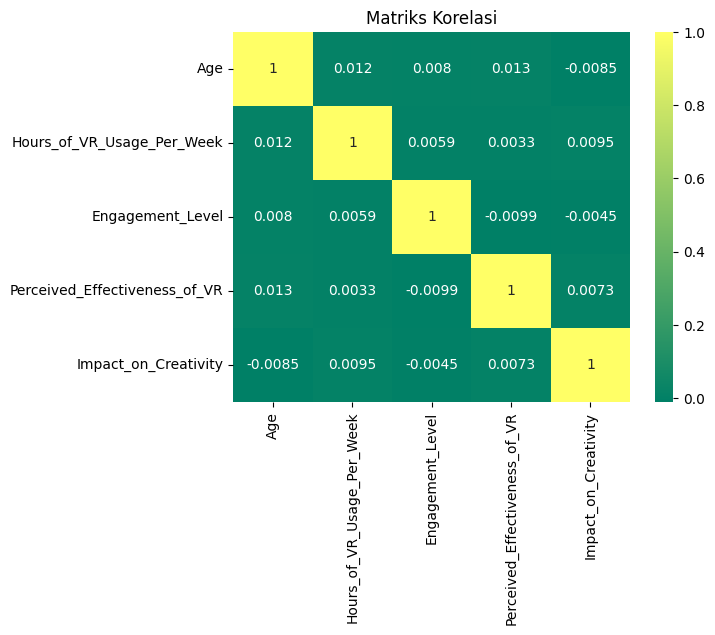

In [ ]:
#correlation matrix heatmaps
correlation_matrix = data.select_dtypes(include=np.number).corr()
#memilih kolom yang berisi numerik pada data dan corr() untuk menganalisis hubungan
sns.heatmap(correlation_matrix, annot=True, cmap='summer') #annot menampilkan nilai korelasi
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

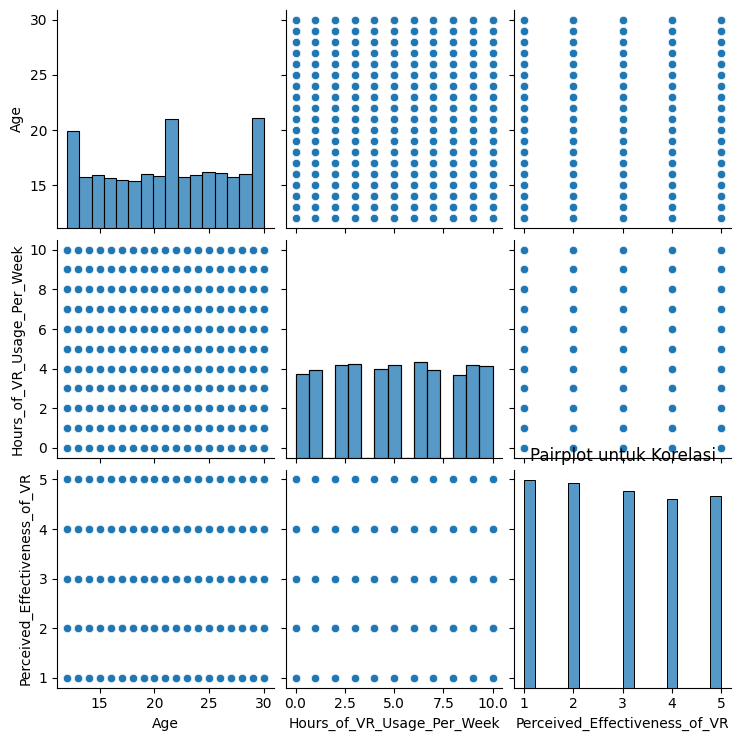

In [ ]:
#pair plot
sns.pairplot(data[['Age', 'Hours_of_VR_Usage_Per_Week', 'Perceived_Effectiveness_of_VR']])
plt.title('Pairplot untuk Korelasi')
plt.show()

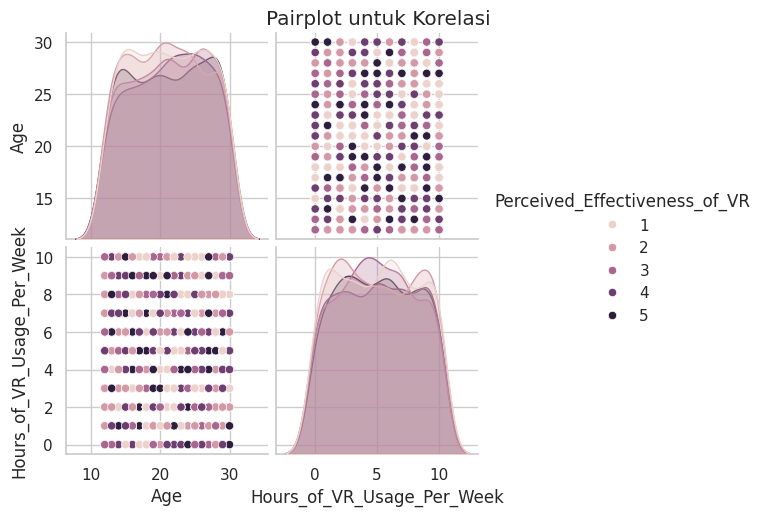

In [ ]:
#pair plot lainnya
pair_plot = sns.pairplot(data[['Age', 'Hours_of_VR_Usage_Per_Week', 'Perceived_Effectiveness_of_VR']], hue='Perceived_Effectiveness_of_VR')
pair_plot.fig.suptitle('Pairplot untuk Korelasi', y=1.02)  # y=1.02 untuk memindahkan judul sedikit ke atas
plt.show()

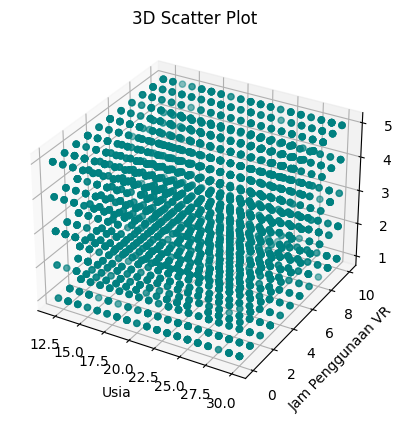

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Hours_of_VR_Usage_Per_Week'], data['Engagement_Level'], c='teal')
ax.set_xlabel('Usia')
ax.set_ylabel('Jam Penggunaan VR')
ax.set_zlabel('Tingkat Keterlibatan')
plt.title('3D Scatter Plot')
plt.show()

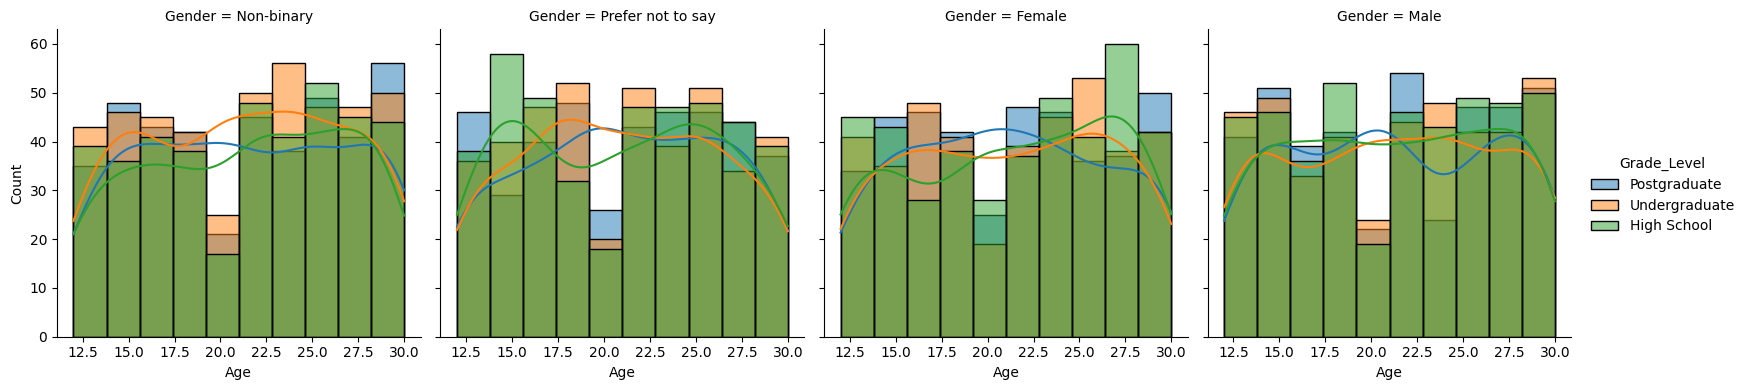

In [ ]:
#facet grid
g = sns.FacetGrid(data, col='Gender', hue='Grade_Level', height=4)
g.map(sns.histplot, 'Age', bins=10, kde=True)
g.add_legend()
plt.show()